In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)
#레드와인인지 화이트와인인지 분류(binary classification)

2.4.0


In [14]:
#와인 데이터셋 불러오기
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [15]:
#와인 데이터셋 합치기
red['type'] = 0 # target value of redwine 
white['type'] = 1# target value of whitewine
print(red.head(2))
print(white.head(2))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

In [16]:
wine = pd.concat([red, white])
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [17]:
#데이터 요약 정보
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [18]:
#데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() -wine.min()) //0에서 1사이로 (min,max 스케일러)

print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [19]:
#데이터 섞은 후 numpy array로 변환
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())

wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2317       0.305785          0.106667     0.373494        0.153374   0.059801   
1284       0.264463          0.226667     0.114458        0.026074   0.102990   
1543       0.603306          0.240000     0.253012        0.024540   0.091362   
1069       0.347107          0.360000     0.210843        0.033742   0.127907   
4107       0.247934          0.146667     0.156627        0.302147   0.046512   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
2317             0.173611              0.338710  0.205899  0.341085   
1284             0.059028              0.069124  0.147484  0.519380   
1543             0.045139              0.029954  0.201851  0.410853   
1069             0.093750              0.105991  0.190669  0.457364   
4107             0.152778              0.331797  0.195874  0.248062   

      sulphates   alcohol   quality  type  
2317   0.123596  0.115942  0.333333   1.0 

In [35]:
#train 데이터와 test 데이터로 분리
train_idx = int(len(wine_np) * 0.8)
print(train_idx)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
#one-hot 코딩으로 바꿔줌 6-59:0
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

5197
[0.30578512 0.10666667 0.37349398 0.15337423 0.05980066 0.17361111
 0.33870968 0.20589936 0.34108527 0.12359551 0.11594203 0.33333333]
1.0
[0.60330579 0.15333333 0.31927711 0.02453988 0.08471761 0.00694444
 0.00921659 0.1659919  0.23255814 0.34269663 0.42028986 0.66666667]
0.0
[0. 1.]
[1. 0.]


In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation = 'relu', input_shape=(12, )),
    tf.keras.layers.Dense(units=24, activation = 'relu'),
    tf.keras.layers.Dense(units=12, activation = 'relu'),
    tf.keras.layers.Dense(units=2, activation = 'sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

#와인 데이터셋 분류 모델 학습 //validation data는 실제로 학습에 사용되지 않고 오버피팅이나 튜닝할 때 사용
history = model.fit(train_X, train_Y, epochs=25, batch_size =32, validation_split=0.25)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_37 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_38 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
122/122 [==============================] - 1s 2ms/step - loss: 0.2229 - accuracy: 0.8718 - val_loss: 0.0719 - val_accuracy: 0.9723
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9822 - val_lo

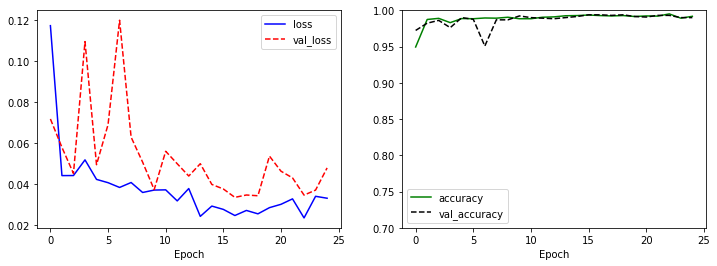

In [46]:
#다항 분류 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [47]:
#분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 648us/step - loss: 0.0568 - accuracy: 0.9938


[0.05683189257979393, 0.9938461780548096]